<a href="https://colab.research.google.com/github/anothergrind/DermAI/blob/main/Lec_2_code_biotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datasets import load_dataset

In [ ]:
hf_repo_id = "preetsojitra/binary-2K-samples-skin-lesion-HM10000"
dataset = load_dataset(hf_repo_id)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00002.parquet:   0%|          | 0.00/277M [00:00<?, ?B/s]

data/train-00001-of-00002.parquet:   0%|          | 0.00/278M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/420M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1511 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['lesion_id', 'image', 'dx', 'dx_type', 'age', 'sex', 'localization', 'dataset', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['lesion_id', 'image', 'dx', 'dx_type', 'age', 'sex', 'localization', 'dataset', 'label'],
        num_rows: 1511
    })
})

In [ ]:
train_ds = dataset["train"]

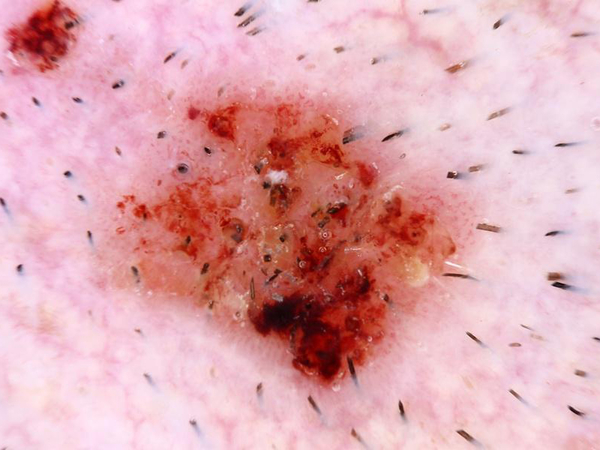

In [ ]:
train_ds[1500]["image"]

In [ ]:
train_ds[1500]["label"]

'malignant'

In [ ]:
from torchvision import transforms

In [ ]:
data_tranforms = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),
])

In [ ]:
import torch
from torch.utils.data import Dataset

In [ ]:
class SkinDataset(Dataset):
  def __init__(self, hf_dataset, transforms=None):
    self.dataset = hf_dataset
    self.transforms = transforms
    self.label_map = {
        "benign":0,
        "malignant": 1
    }

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]

    image = item["image"]
    if self.transforms:
      image = self.transforms(image)

    label = item["label"]
    label_int = self.label_map[label]

    label = torch.tensor(label_int, dtype=torch.long)

    return image, label


In [ ]:
train_pyt_ds = SkinDataset(dataset["train"], data_tranforms)
test_pyt_ds = SkinDataset(dataset["test"], data_tranforms)

In [ ]:
train_pyt_ds[0]

(tensor([[[ 0.0510,  0.0902,  0.1059,  ...,  0.1373,  0.1059,  0.0667],
          [ 0.0118,  0.0510,  0.0980,  ...,  0.1529,  0.1373,  0.0824],
          [-0.0667, -0.0431,  0.0510,  ...,  0.1451,  0.1216,  0.0902],
          ...,
          [ 0.0902,  0.1137,  0.0980,  ..., -0.0431, -0.0196,  0.0118],
          [ 0.0745,  0.0980,  0.0745,  ..., -0.0275, -0.0431, -0.0118],
          [ 0.0824,  0.0745,  0.0588,  ..., -0.0353, -0.0431, -0.0353]],
 
         [[-0.2549, -0.2000, -0.1765,  ..., -0.1216, -0.1529, -0.2078],
          [-0.3255, -0.2706, -0.2078,  ..., -0.0980, -0.0980, -0.1686],
          [-0.4353, -0.4039, -0.2863,  ..., -0.1137, -0.1373, -0.1843],
          ...,
          [-0.1686, -0.1451, -0.1686,  ..., -0.3176, -0.2627, -0.2157],
          [-0.1765, -0.1451, -0.1922,  ..., -0.2941, -0.2941, -0.2471],
          [-0.1686, -0.1765, -0.2078,  ..., -0.2863, -0.3020, -0.2706]],
 
         [[-0.2314, -0.1843, -0.1529,  ..., -0.0118, -0.0353, -0.0980],
          [-0.3412, -0.2706,

In [ ]:
img, label = train_pyt_ds[0]
img.shape

torch.Size([3, 128, 128])

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
BATCH_SIZE=32

train_loader = DataLoader(train_pyt_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_pyt_ds, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))